In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("data/netflix_titles.csv")

In [54]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [55]:
df.shape #8807 rows and 12 columns

(8807, 12)

# Handling Missing values 

In [ ]:
df.fillna(value= "Missing")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,0,0,0,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


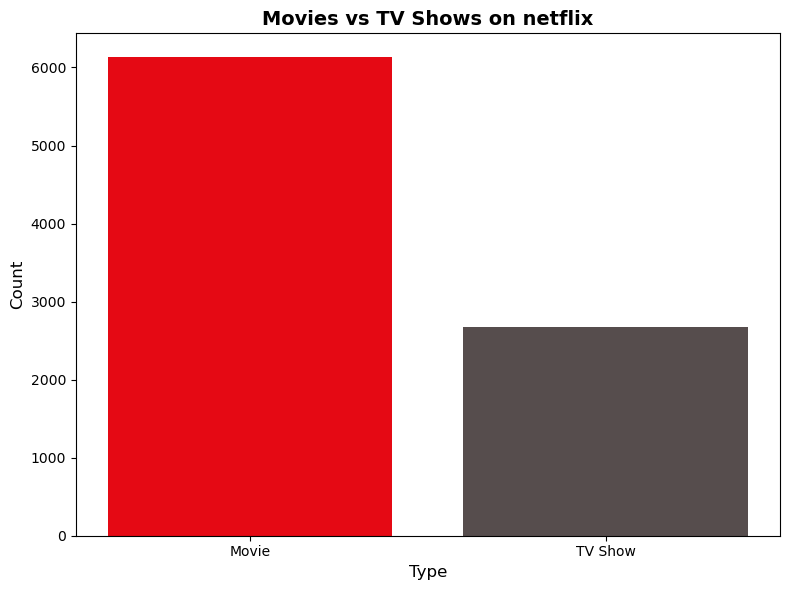

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [57]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values, color=['#E50914', '#564d4d'])
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Movies vs TV Shows on netflix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(type_counts)

In [58]:
'''
top_genres = df['listed_in'].value_counts()
top_genres = top_genres.nlargest(10)

plt.figure(figsize=(8, 6))
plt.bar(top_genres.index, top_genres.values, color=['#E50914'])
plt.xlabel('Ganre', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.title('Top 10 genres', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

print(top_genres)
'''

"\ntop_genres = df['listed_in'].value_counts()\ntop_genres = top_genres.nlargest(10)\n\nplt.figure(figsize=(8, 6))\nplt.bar(top_genres.index, top_genres.values, color=['#E50914'])\nplt.xlabel('Ganre', fontsize=24)\nplt.ylabel('Count', fontsize=24)\nplt.title('Top 10 genres', fontsize=25, fontweight='bold')\nplt.tight_layout()\nplt.show()\n\nprint(top_genres)\n"

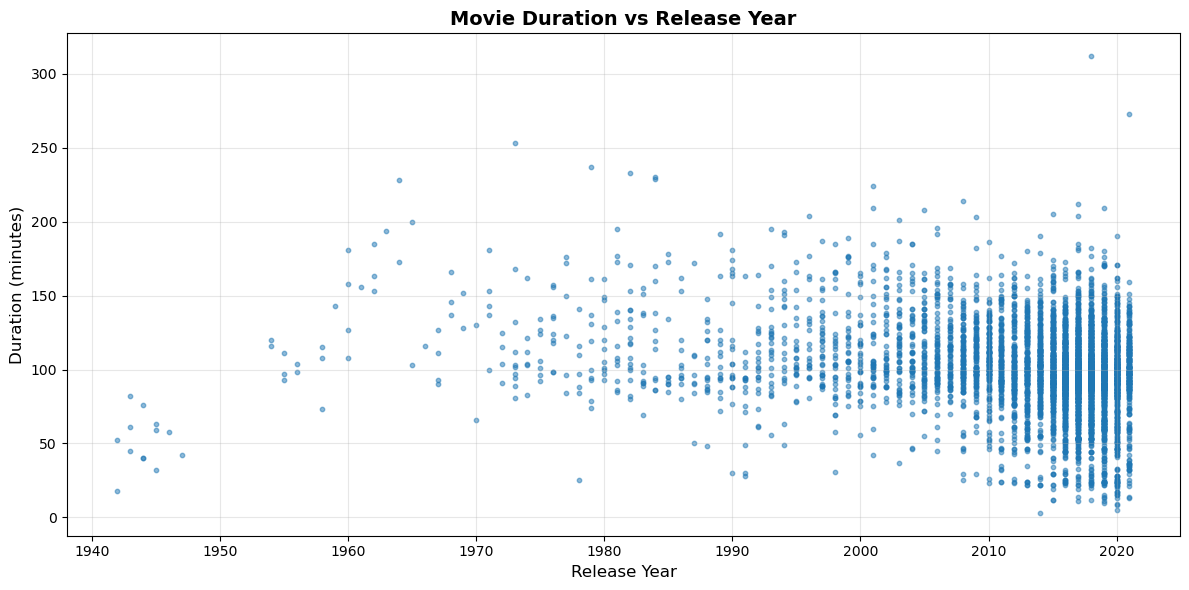

In [20]:
df_movies = df[df['type']=='Movie'].copy()
# Drop rows with missing duration values
df_movies = df_movies.dropna(subset=['duration'])
# Extract duration as integer
df_movies['duration int'] = df_movies['duration'].str.split(' ').str[0].astype(int)

# Use scatter plot instead of line plot for better visualization
plt.figure(figsize=(12, 6))
plt.scatter(df_movies['release_year'], df_movies['duration int'], alpha=0.5, s=10)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.title('Movie Duration vs Release Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

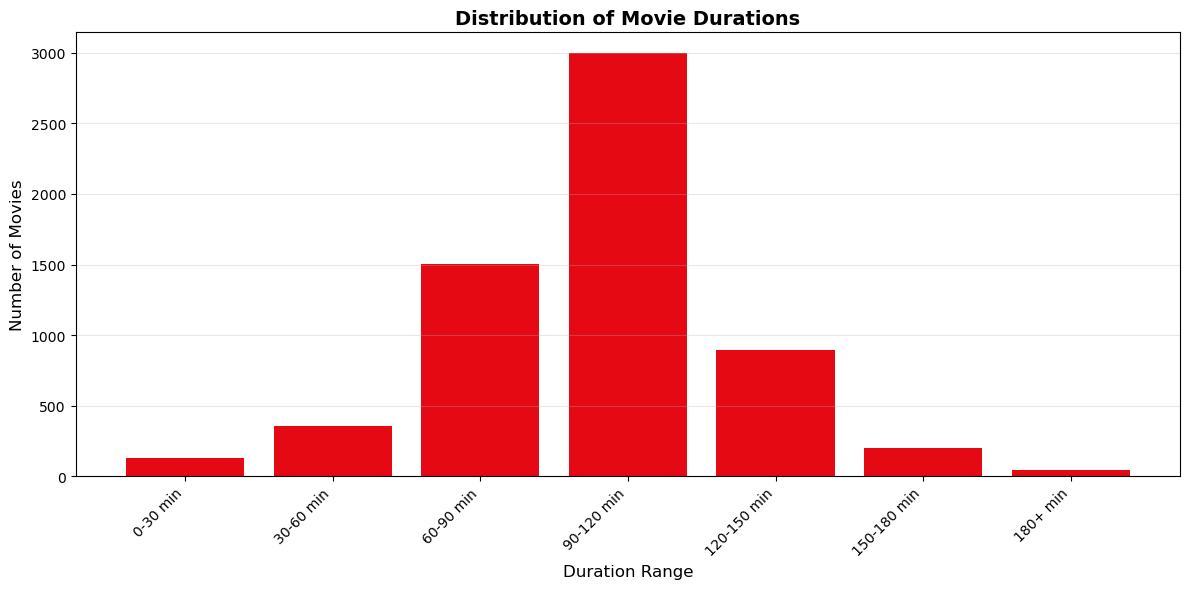

duration_range
0-30 min        130
30-60 min       357
60-90 min      1503
90-120 min     2996
120-150 min     897
150-180 min     198
180+ min         46
Name: count, dtype: int64


In [19]:
df_movies = df[df['type']=='Movie'].copy()
# Drop rows with missing duration values
df_movies = df_movies.dropna(subset=['duration'])
# Extract duration as integer
df_movies['duration int'] = df_movies['duration'].str.split(' ').str[0].astype(int)

# Create duration ranges (bins)
bins = [0, 30, 60, 90, 120, 150, 180, 300]  # 0-30, 30-60, 60-90, 90-120, 120-150, 150-180, 180+
labels = ['0-30 min', '30-60 min', '60-90 min', '90-120 min', '120-150 min', '150-180 min', '180+ min']
df_movies['duration_range'] = pd.cut(df_movies['duration int'], bins=bins, labels=labels, include_lowest=True)

# Count movies in each range
duration_counts = df_movies['duration_range'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, color='#E50914')
plt.xlabel('Duration Range', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Distribution of Movie Durations', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(duration_counts)